import data

In [ ]:
import pandas as pd
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from numpy.random import uniform
from sklearn.datasets import make_blobs
import seaborn as sns
import random
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

read data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/HW4/data.csv')
df.head()

,Unnamed: 0,x,y
0,0,0.874365,5.926937
1,1,-3.185937,2.356974
2,2,-3.472231,3.131644
3,3,0.589067,4.318645
4,4,-2.955939,2.162257


delete index

In [ ]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)
df.head()

,x,y
0,0.874365,5.926937
1,-3.185937,2.356974
2,-3.472231,3.131644
3,0.589067,4.318645
4,-2.955939,2.162257


Kmeans from scratch

In [ ]:
def euclidean(point, data):
    """
    Euclidean distance between point & data.
    Point has dimensions (m,), data has dimensions (n,m), and output will be of size (n,).
    """
    return np.sqrt(np.sum((point - data)**2, axis=1))
class KMeans:
    def __init__(self, n_clusters=8, max_iter=300):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
    def fit(self, X_train):
        # Initialize the centroids, using the "k-means++" method, where a random datapoint is selected as the first,
        # then the rest are initialized w/ probabilities proportional to their distances to the first
        # Pick a random point from train data for first centroid
        self.centroids = [random.choice(X_train)]
        for _ in range(self.n_clusters-1):
            # Calculate distances from points to the centroids
            dists = np.sum([euclidean(centroid, X_train) for centroid in self.centroids], axis=0)
            # Normalize the distances
            dists /= np.sum(dists)
            # Choose remaining points based on their distances
            new_centroid_idx, = np.random.choice(range(len(X_train)), size=1, p=dists)
            self.centroids += [X_train[new_centroid_idx]]
        # This initial method of randomly selecting centroid starts is less effective
        # min_, max_ = np.min(X_train, axis=0), np.max(X_train, axis=0)
        # self.centroids = [uniform(min_, max_) for _ in range(self.n_clusters)]
        # Iterate, adjusting centroids until converged or until passed max_iter
        iteration = 0
        prev_centroids = None
        while np.not_equal(self.centroids, prev_centroids).any() and iteration < self.max_iter:
            # Sort each datapoint, assigning to nearest centroid
            sorted_points = [[] for _ in range(self.n_clusters)]
            for x in X_train:
                dists = euclidean(x, self.centroids)
                centroid_idx = np.argmin(dists)
                sorted_points[centroid_idx].append(x)
            # Push current centroids to previous, reassign centroids as mean of the points belonging to them
            prev_centroids = self.centroids
            self.centroids = [np.mean(cluster, axis=0) for cluster in sorted_points]
            for i, centroid in enumerate(self.centroids):
                if np.isnan(centroid).any():  # Catch any np.nans, resulting from a centroid having no points
                    self.centroids[i] = prev_centroids[i]
            iteration += 1
    def evaluate(self, X):
        centroids = []
        centroid_idxs = []
        for x in X:
            dists = euclidean(x, self.centroids)
            centroid_idx = np.argmin(dists)
            centroids.append(self.centroids[centroid_idx])
            centroid_idxs.append(centroid_idx)
        return centroids, centroid_idxs

run kmeans and plot for i=2:10

k= 2


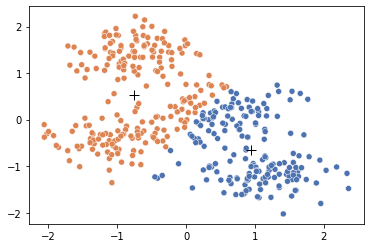

k= 3


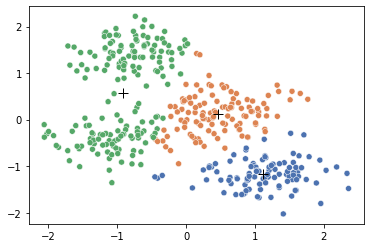

k= 4


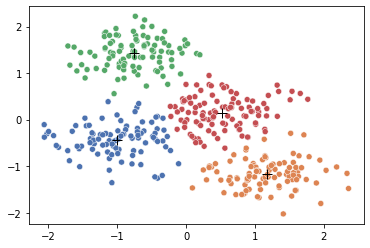

k= 5


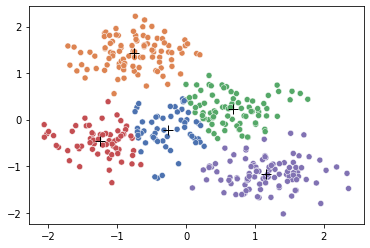

k= 6


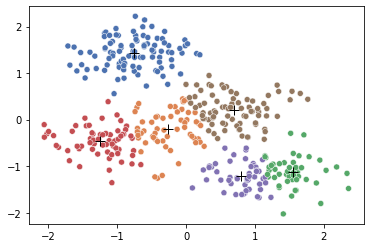

k= 7


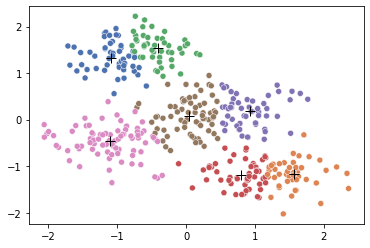

k= 8


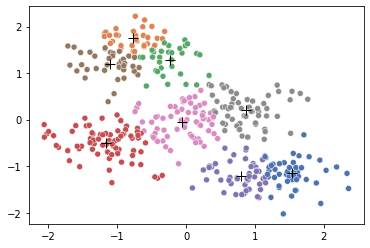

k= 9


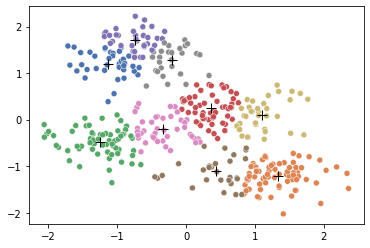

k= 10


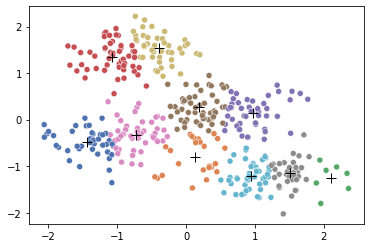

In [ ]:
#kmeans
for i in range(2,11):
    kmeans=KMeans(n_clusters=i)
    df = StandardScaler().fit_transform(df)
    kmeans.fit(df)
    #plot the clusters
    print('k=',i)
    # View results
    class_centers, classification = kmeans.evaluate(df)
    sns.scatterplot(x=[X[0] for X in df],
                    y=[X[1] for X in df],
                    hue=classification,
                    palette="deep",
                    legend=None
                    )
    plt.plot([x for x, _ in kmeans.centroids],
            [y for _, y in kmeans.centroids],
            'k+',
            markersize=10,
            )
    plt.show()

Import Packages

In [ ]:
!pip install webcolors

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# image processing
from PIL import Image
from io import BytesIO
import webcolors
from sklearn.cluster import KMeans
# visualization
from importlib import reload
import seaborn as sns

Suppress image clipping warning,
Set color of plot to be contrast.
Change float format to three decimal places

In [ ]:
import logging
logger = logging.getLogger()
old_level = logger.level
logger.setLevel(100)
sns.set(style="ticks", color_codes=True)
pd.options.display.float_format = '{:.3f}'.format

Image Exploration

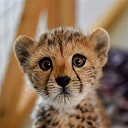

In [ ]:
ori_img = Image.open("/content/drive/MyDrive/HW4/pirooz.jpg")
ori_img

In [ ]:
X = np.array(ori_img.getdata())
ori_pixels = X.reshape(*ori_img.size, -1)
ori_pixels.shape

(128, 128, 3)

identify other attributes of an image, which are image size in kilobytes (KB) and the number of unique colors.

In [ ]:
def imageByteSize(img):
    img_file = BytesIO()
    image = Image.fromarray(np.uint8(img))
    image.save(img_file, 'png')
    return img_file.tell()/1024

ori_img_size = imageByteSize(ori_img)
ori_img_size

31.9345703125

number of color in original picture

In [ ]:
ori_img_n_colors = len(set(ori_img.getdata()))
ori_img_n_colors

12311

In [ ]:
ori_img_total_variance = sum(np.linalg.norm(X - np.mean(X, axis = 0), axis = 1)**2)
ori_img_total_variance

122986548.52798036

K-Means Clustering

Here's a function to convert RGB value to its English color name

In [ ]:
def closest_colour(requested_colour):
    min_colours = {}
    for key, name in webcolors.CSS3_HEX_TO_NAMES.items():
        r_c, g_c, b_c = webcolors.hex_to_rgb(key)
        rd = (r_c - requested_colour[0]) ** 2
        gd = (g_c - requested_colour[1]) ** 2
        bd = (b_c - requested_colour[2]) ** 2
        min_colours[(rd + gd + bd)] = name
    return min_colours[min(min_colours.keys())]

def get_colour_name(requested_colour):
    try:
        closest_name = actual_name = webcolors.rgb_to_name(requested_colour)
    except ValueError:
        closest_name = closest_colour(requested_colour)
    return closest_name

we can represent each of the pixels value in a cluster by its cluster centroid. Thus, there will be only two unique pixel values in the compressed image.

In [ ]:
def replaceWithCentroid(kmeans):
    new_pixels = []
    for label in kmeans.labels_:
        pixel_as_centroid = list(kmeans.cluster_centers_[label])
        new_pixels.append(pixel_as_centroid)
    new_pixels = np.array(new_pixels).reshape(*ori_img.size, -1)
    return new_pixels

Our clustering step is done, let's take a look at the compressed image result.

1. Within Cluster Sum of Square ($WCSS$), measures the sum of squared Euclidean distance of all the points within a cluster to its cluster centroid.

    $WCSS = \sum\limits_{i=0}^N ||x_i-c_{p(i)}||^2$
    
    where:
    * $N$ is the number of data points
    * $x_i$ is the $i$-th data, a 3D vector of RGB value
    * $c_{p(i)}$ is the cluster centroid of data-$i$

2. Between Cluster Sum of Square ($BCSS$), measures the sum of squared Euclidean distance between all centroids.

    $BCSS = \sum\limits_{j=0}^k n_j . ||c_j-\bar{x}||^2$
    
    where:
    * $k$ is the number of cluster
    * $n_j$ is the total data present in cluster-$j$
    * $c_j$ is the centroid of cluster-$j$, a 3D vector of RGB value
    * $\bar{x}$ is the mean of each RGB value

3. Explained Variance, measures how many percents that the compressed image can explain the variance of the original image.

    $Explained Variance = \dfrac{BCSS}{WCSS+BCSS}$
    
If each pixel is considered as an individual cluster ($k = N$), then $WCSS$ is equal to $0$.

Hence, $Explained Variance = 100\%$

4. Image size, measured in kilobytes to evaluate the reduction/compression performance.


In [ ]:
def calculateBCSS(X, kmeans):
    _, label_counts = np.unique(kmeans.labels_, return_counts = True)
    diff_cluster_sq = np.linalg.norm(kmeans.cluster_centers_ - np.mean(X, axis = 0), axis = 1)**2
    return sum(label_counts * diff_cluster_sq)

run kmeans and plot for i=2:16

In [ ]:
range_k_clusters = (2, 17)

kmeans_result = []
for k in range(*range_k_clusters):
    # CLUSTERING
    kmeans = KMeans(n_clusters = k,random_state = 123).fit(X)

    # REPLACE PIXELS WITH ITS CENTROID
    new_pixels = replaceWithCentroid(kmeans)

    # EVALUATE
    WCSS = kmeans.inertia_
    BCSS = calculateBCSS(X, kmeans)
    exp_var = 100*BCSS/(WCSS + BCSS)

    metric = {
        "No. of Colors": k,
        "Centroids": list(map(get_colour_name, np.uint8(kmeans.cluster_centers_))),
        "Pixels": new_pixels,
        "WCSS": WCSS,
        "BCSS": BCSS,
        "Explained Variance": exp_var,
        "Image Size (KB)": imageByteSize(new_pixels)
    }

    kmeans_result.append(metric)
kmeans_result = pd.DataFrame(kmeans_result).set_index("No. of Colors")

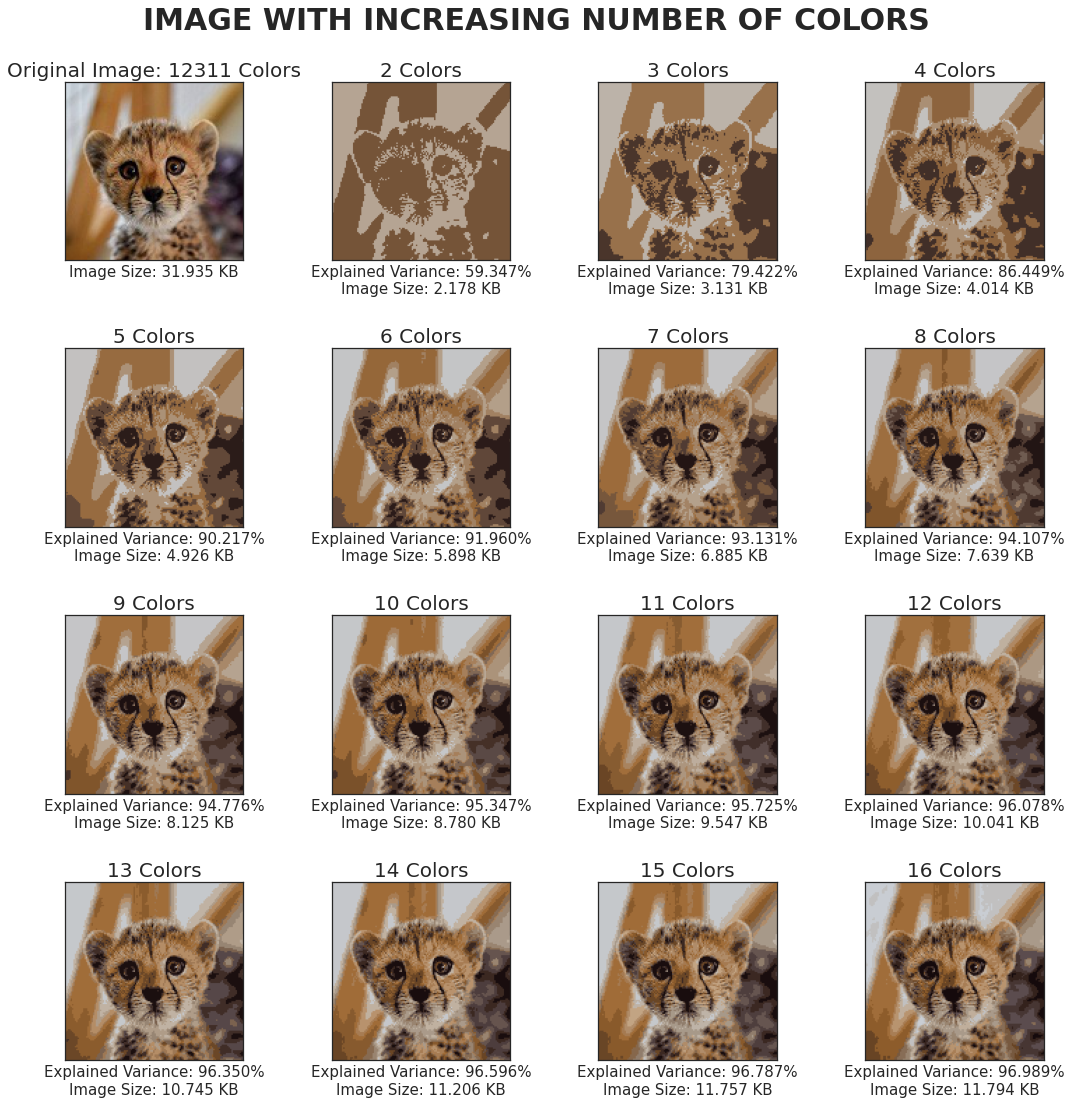

In [ ]:
fig, axes = plt.subplots(4, 4, figsize=(15,15))

# PLOT ORIGINAL IMAGE
axes[0][0].imshow(X.reshape(*ori_img.size, 3))
axes[0][0].set_title("Original Image: {} Colors".format(ori_img_n_colors), fontsize = 20)
axes[0][0].set_xlabel("Image Size: {:.3f} KB".format(ori_img_size), fontsize = 15)
axes[0][0].set_xticks([])
axes[0][0].set_yticks([])

# PLOT COLOR-REDUCED IMAGE
for ax, k, pixels in zip(axes.flat[1:], kmeans_result.index, kmeans_result["Pixels"]):
    compressed_image = np.array(pixels/255).reshape(*ori_img.size, 3)
    ax.imshow(compressed_image)
    ax.set_title("{} Colors".format(k), fontsize=20)
    ax.set_xlabel("Explained Variance: {:.3f}%\nImage Size: {:.3f} KB".format(kmeans_result.loc[k, "Explained Variance"],
                                                                              kmeans_result.loc[k, "Image Size (KB)"]),
                  fontsize=15)
    ax.set_xticks([])
    ax.set_yticks([])
plt.tight_layout()
fig.suptitle("IMAGE WITH INCREASING NUMBER OF COLORS", size = 30, y = 1.03, fontweight = "bold")
plt.show()